In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd

In [59]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [61]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [62]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [63]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [67]:
#choose startdate and end date of vacation
# start_date = input("Enter vacation start date in YYYY-MM-DD format")
# end_date = input("Enter vacation end date in YYYY-MM-DD format")

date_input = input("Enter vacation start date in YYYY-MM-DD format ")
year, month, day = map(int, date_input.split('-'))
start_date = dt.date(year, month, day)

date_input_2 = input("Enter vacation end date in YYYY-MM-DD format ")
year, month, day = map(int, date_input.split('-'))
end_date = dt.date(year, month, day)
# Design a query to retrieve the last 12 months of precipitation data and plot the results

Enter vacation start date in YYYY-MM-DD format 2014-10-10
Enter vacation end date in YYYY-MM-DD format 2014-10-20


In [68]:
print(start_date)
print(year_ago)

2014-10-10
2017-10-20


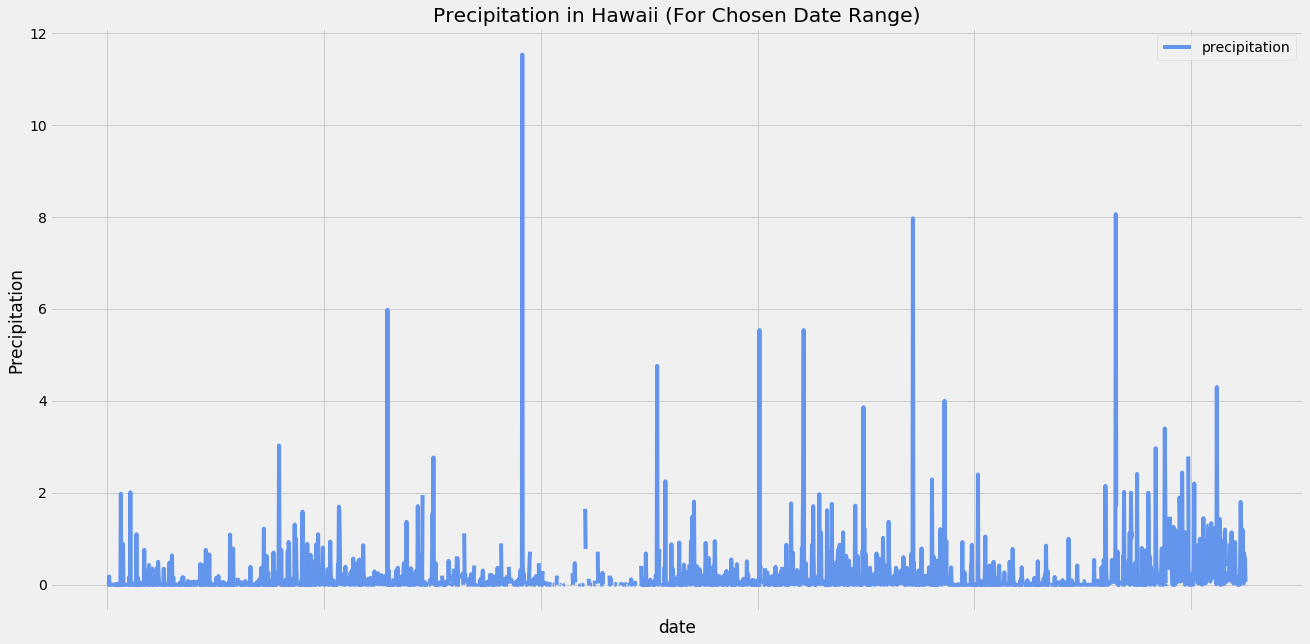

In [128]:
year_ago = start_date - dt.timedelta(365)

pcp_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(year_ago, start_date)).all()
# pcp_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(2017-10-17, 2018-10-17))
# pcp_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2010-10-14').all()
# filter(Measurement.date <= start_date).all()
#                                                                     filter(Measurement.date > year_ago).all()


# pcp_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).\
#     filter(Measurement.date <= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
pcp_last_year_df = pd.DataFrame(pcp_last_year, columns=["date", "precipitation"])
pcp_last_year_df.set_index('date', inplace=True)

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
#plot precipitation data
pcp_graph = pcp_last_year_df.plot(figsize = (20, 10), color='cornflowerblue')
plt.ylabel('Precipitation')
plt.title("Precipitation in Hawaii (For Chosen Date Range)")
plt.show()


In [71]:
pcp_last_year_df.head()

,precipitation
date,
2013-10-10,0.00
2013-10-11,0.00
2013-10-12,0.00
2013-10-13,0.00
2013-10-14,0.18


![precipitation](Images/precipitation.png)

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pcp_last_year_df.describe()

,precipitation
count,2430.000000
mean,0.174609
std,0.533044
min,0.000000
25%,0.000000
50%,0.010000
75%,0.140000
max,11.530000


![describe](Images/describe.png)

In [88]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.station).count()
print(f'There are {num_stations} stations.')

There are 9 stations.


In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
print(active)
print(f'The most active station is: {active[0][0]} with {active[1][1]}.')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
The most active station is: USC00519281 with 2724.


In [118]:
# Using the station id from the previous query, calculate the lowest temperature recorded and 
# highest temperature recorded from most active station?
temp = session.query(Measurement.tobs).\
                    filter(Measurement.station == active[0][0]).\
                    filter(Measurement.date.between(year_ago,start_date)).\
                    order_by(Measurement.tobs.desc()).all()


print(f'The lowest temp was {min(temp)}, the highest temp was {max(temp)}')

The lowest temp was (57.0,), the highest temp was (81.0,)


In [119]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_last_year = [x[0] for x in temp]

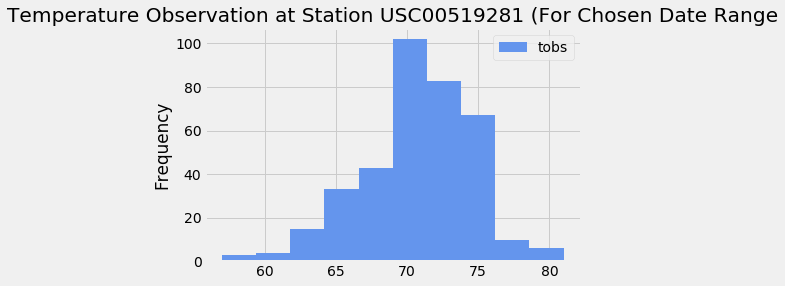

In [127]:
plt.hist(temp_last_year, bins=10, color='cornflowerblue')
plt.title("Temperature Observation at Station USC00519281 (For Chosen Date Range")
plt.ylabel('Frequency')
labels = ['tobs']
plt.legend(labels)

![precipitation](Images/station-histogram.png)